In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def customGraphSettings():
    colors = sns.color_palette("husl", 5)
    plot_settings = {
        'figure.figsize': (10, 7),
        'lines.linestyle': '--',
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'axes.grid': True,
        'font.family': 'serif',
        'font.size': 12}
    plt.rcParams.update(plot_settings)
    plt.style.use('seaborn-v0_8-darkgrid')
    return colors

customGraphSettings()

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522)]

11


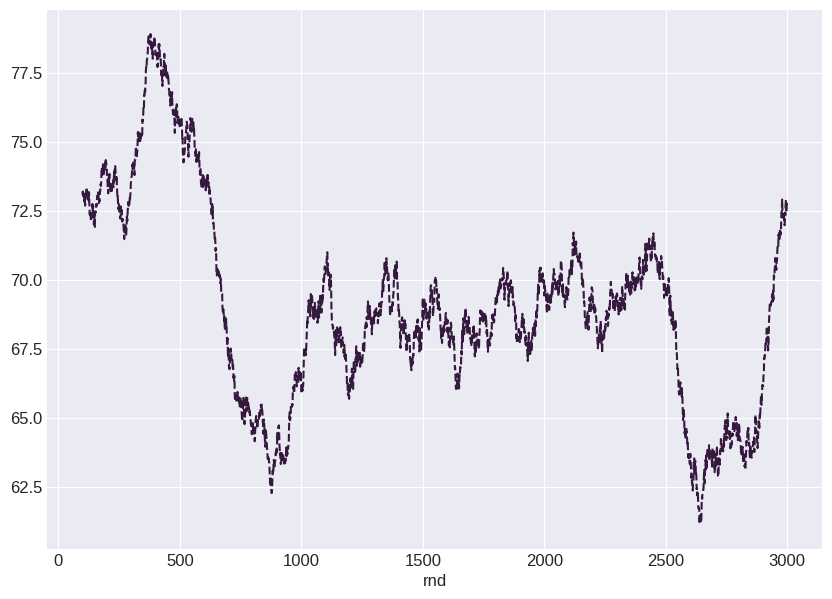

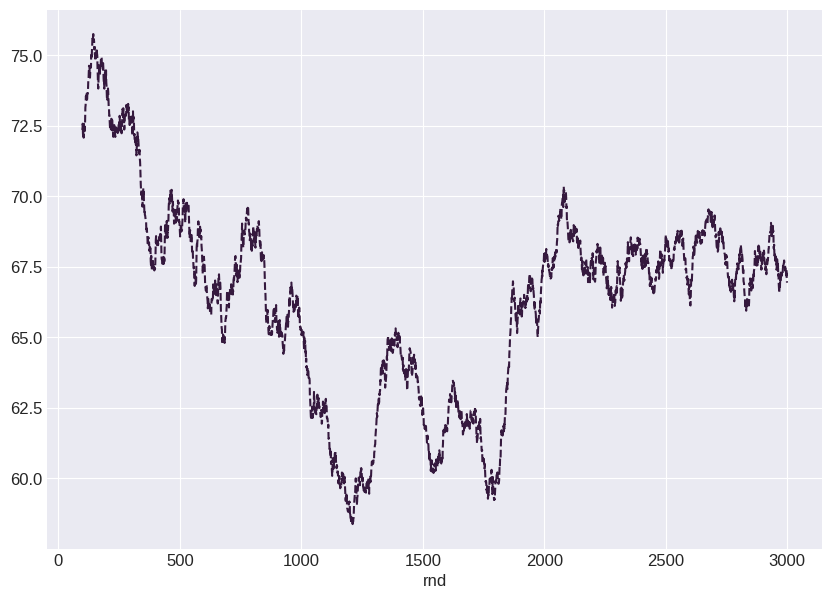

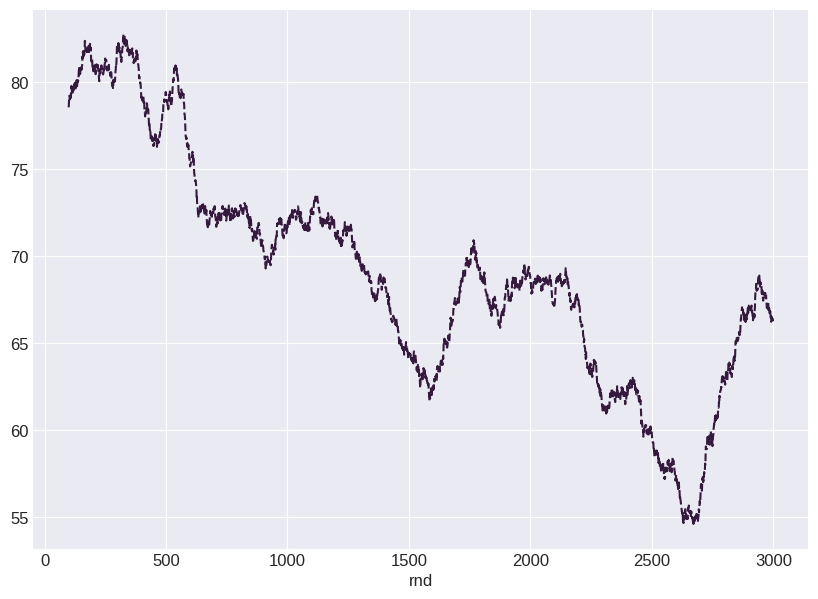

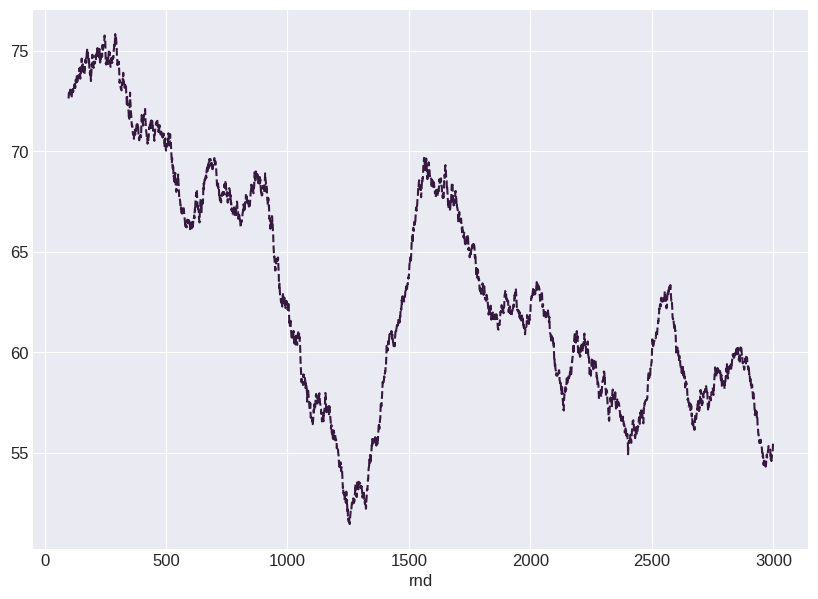

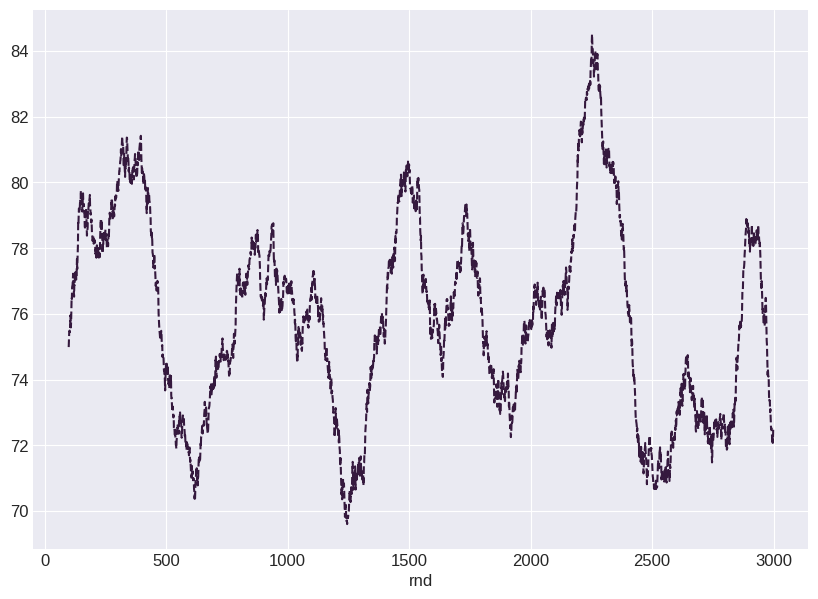

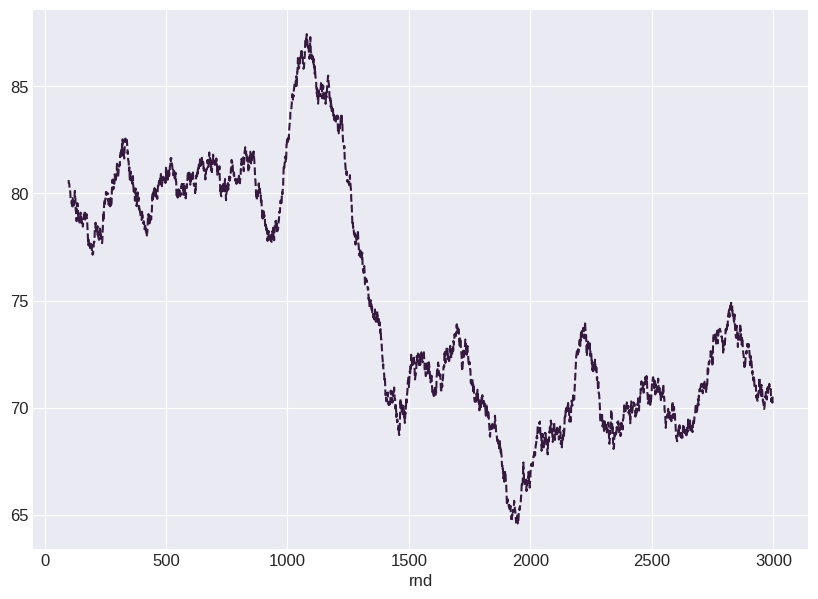

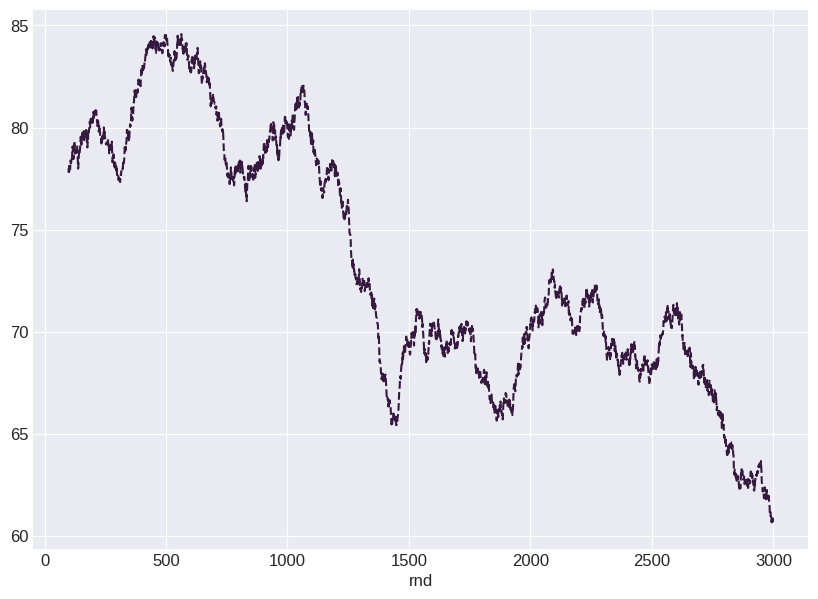

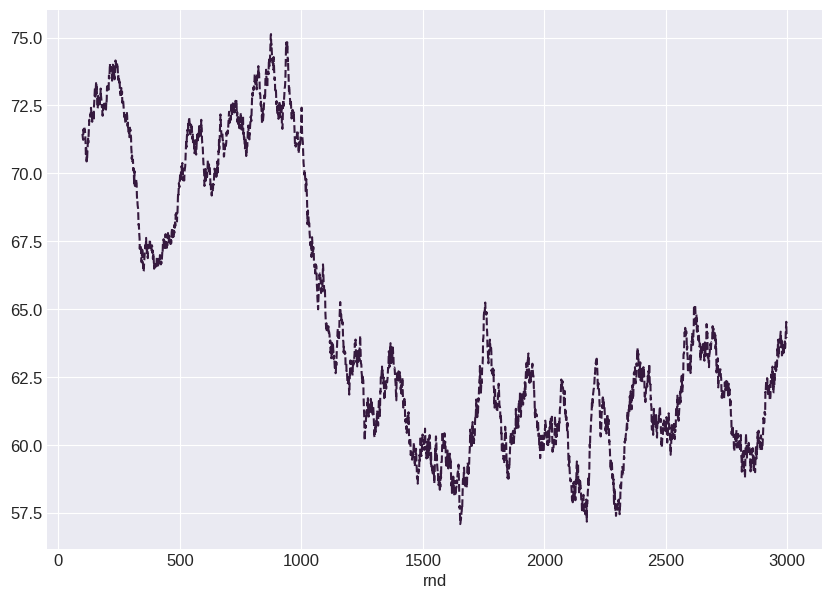

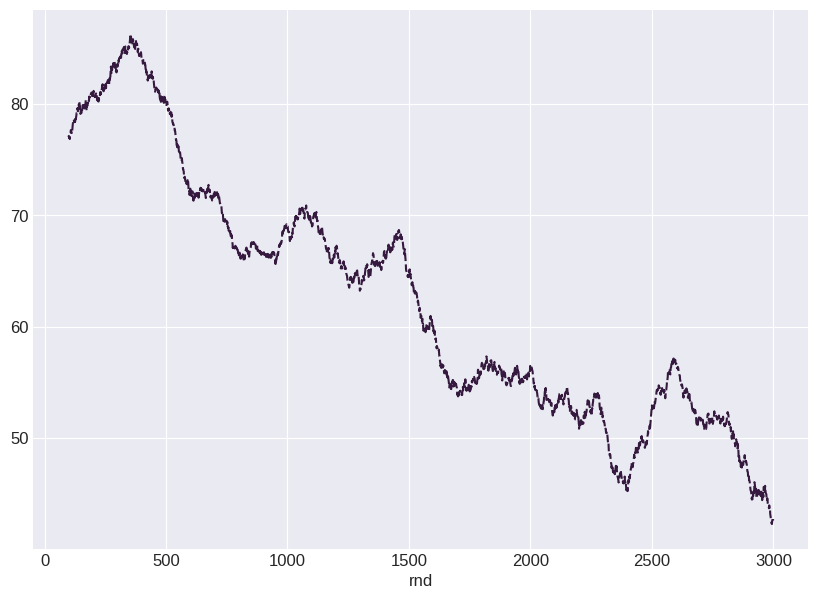

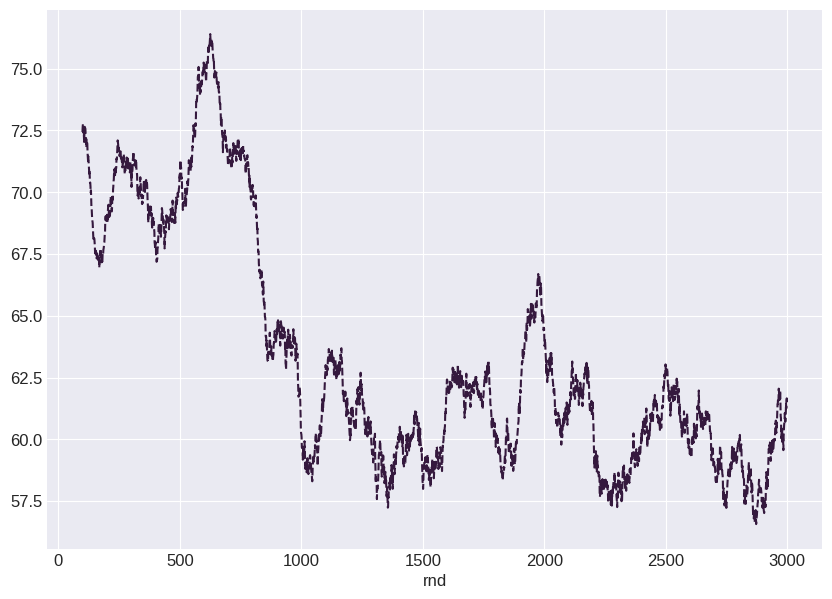

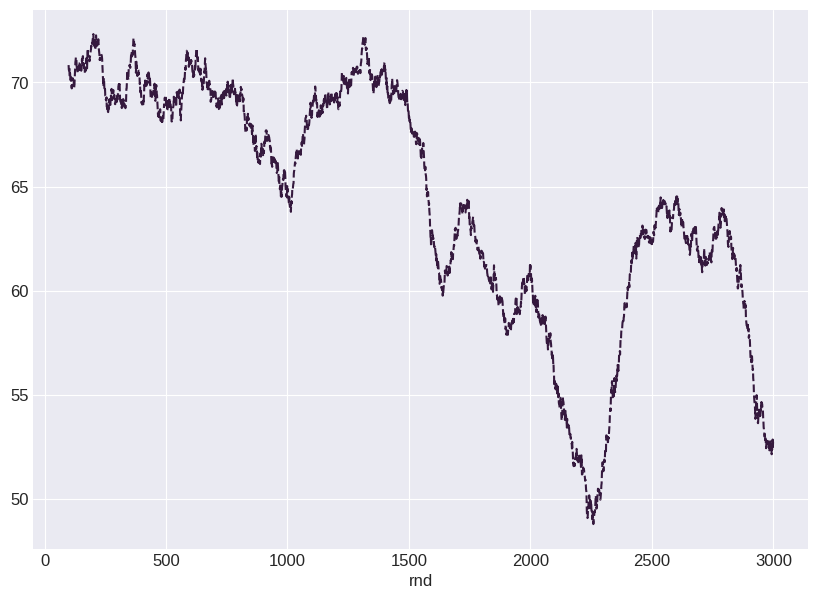

15


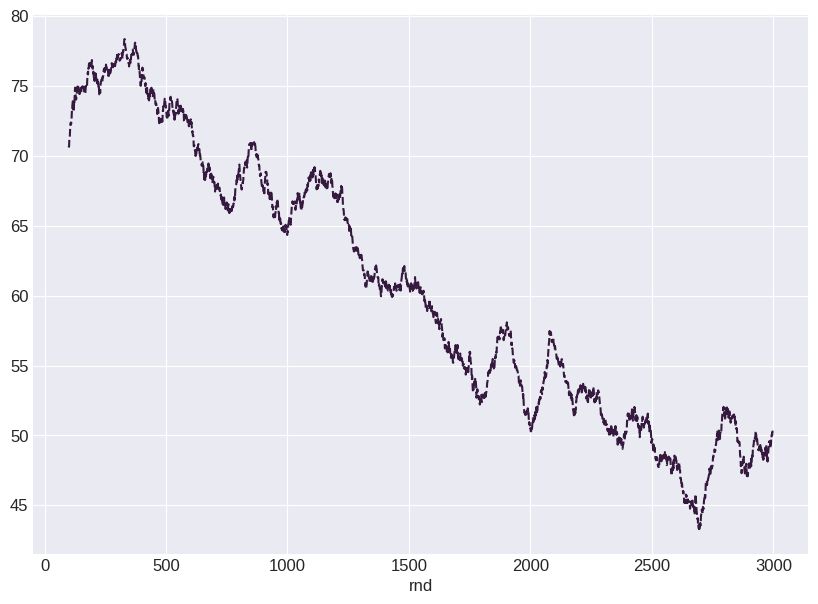

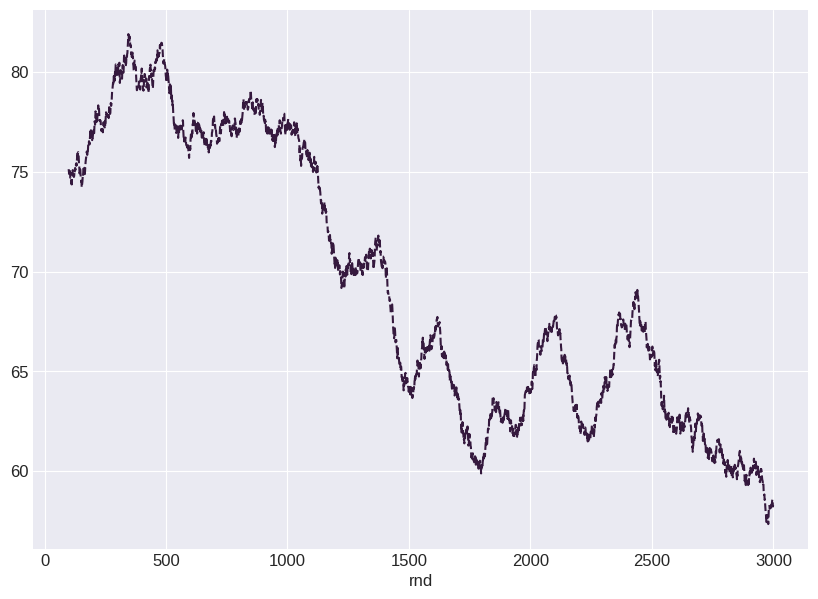

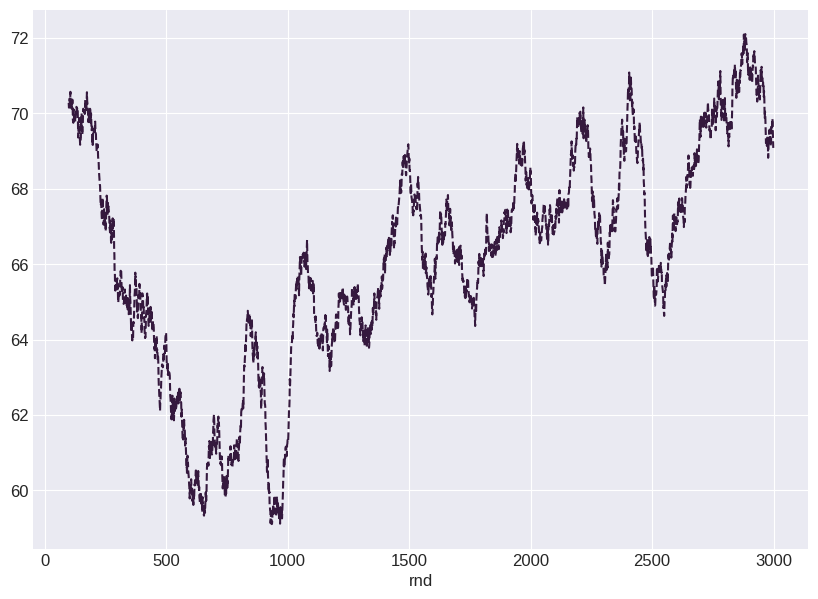

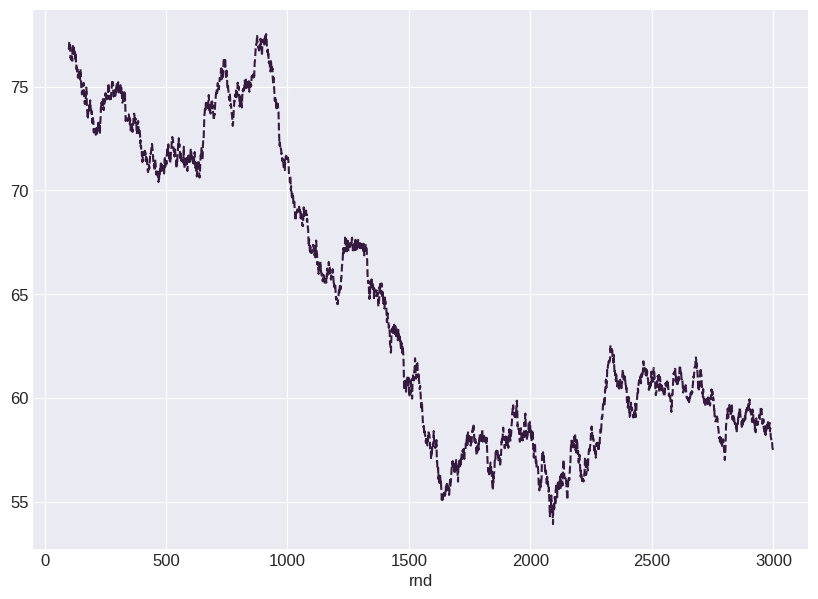

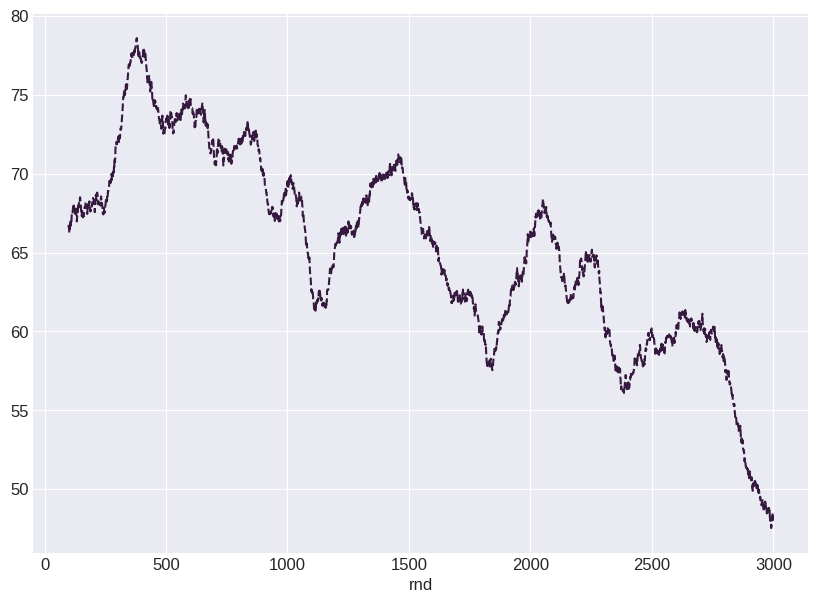

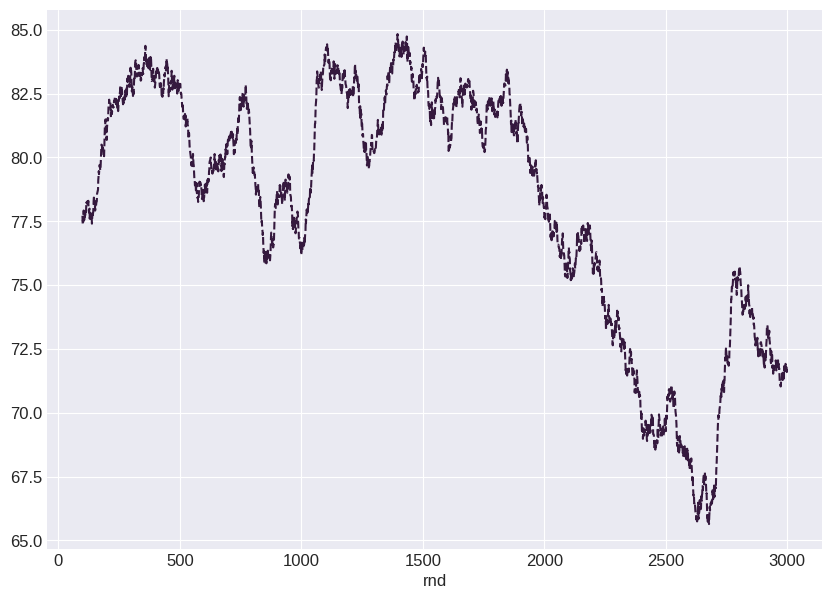

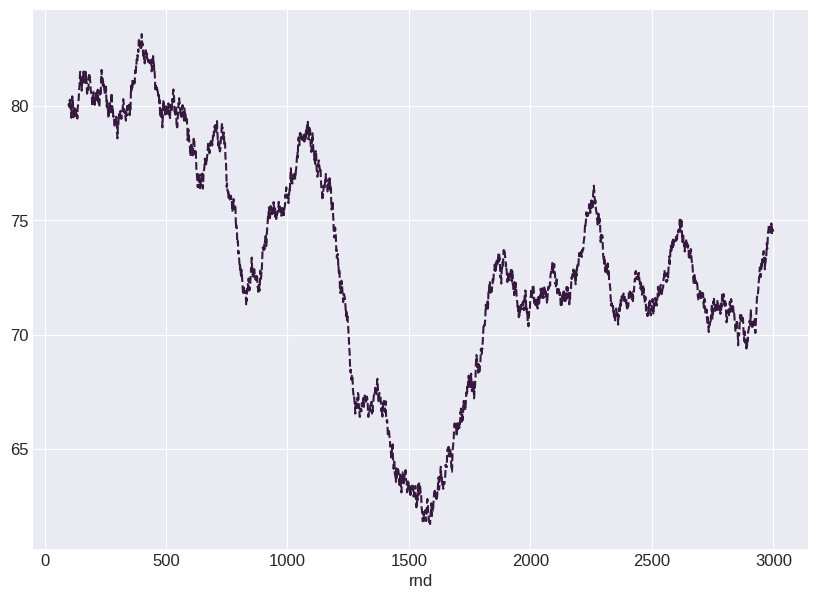

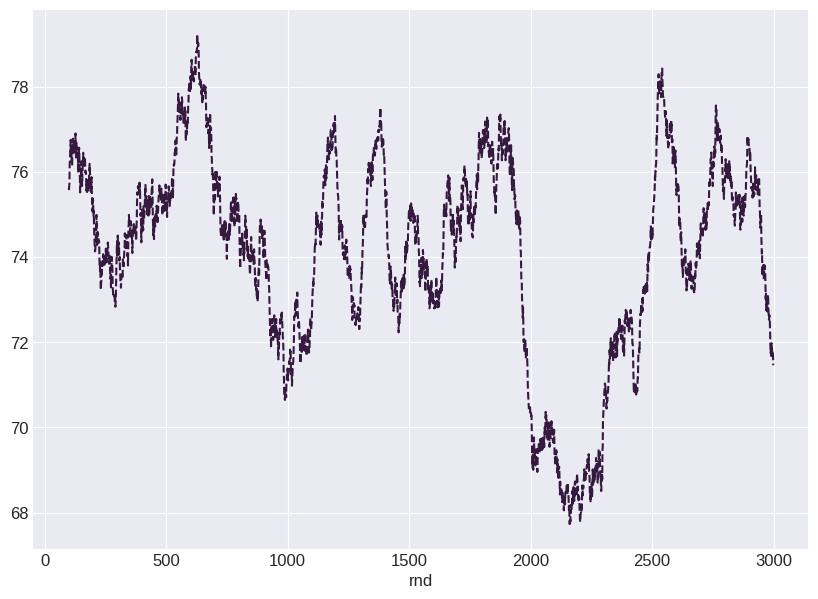

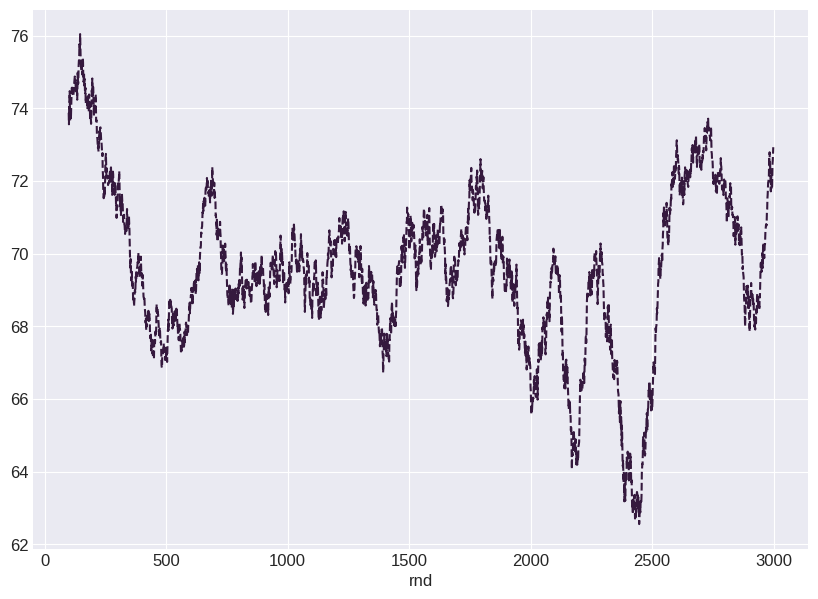

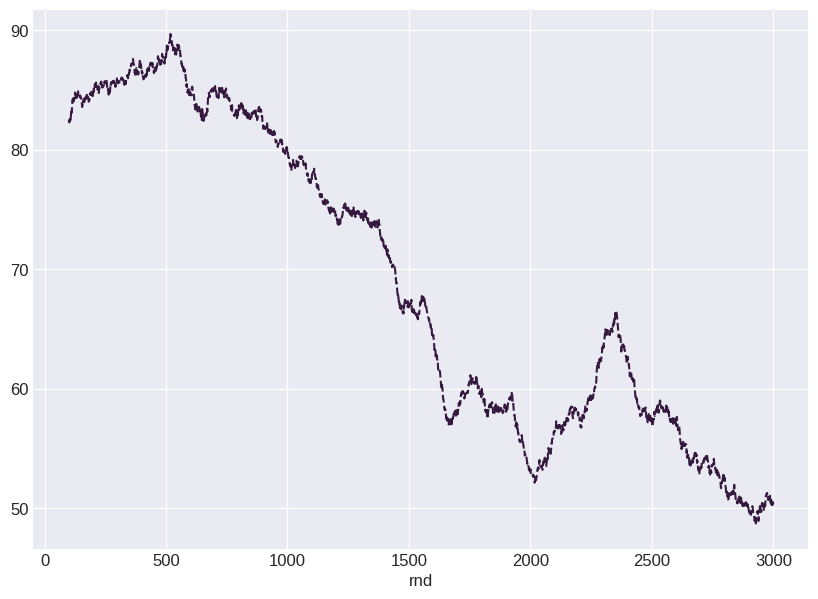

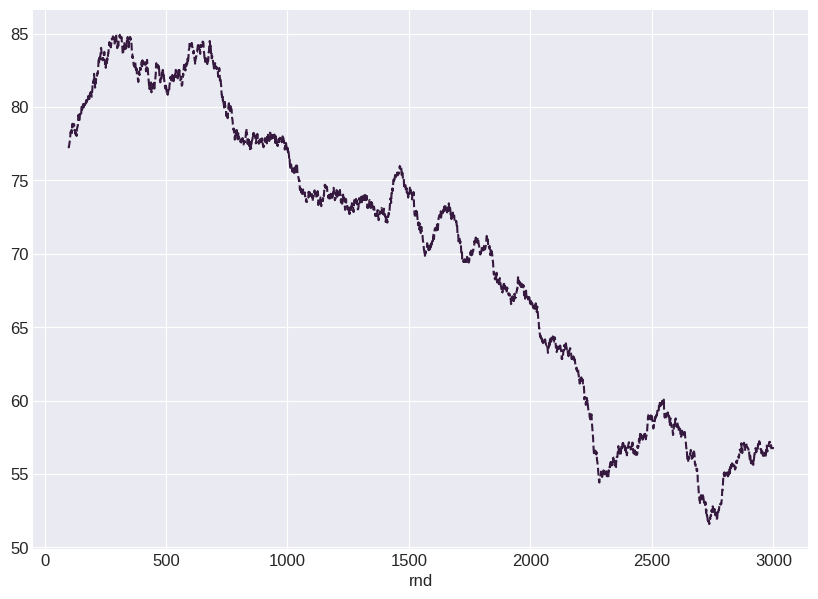

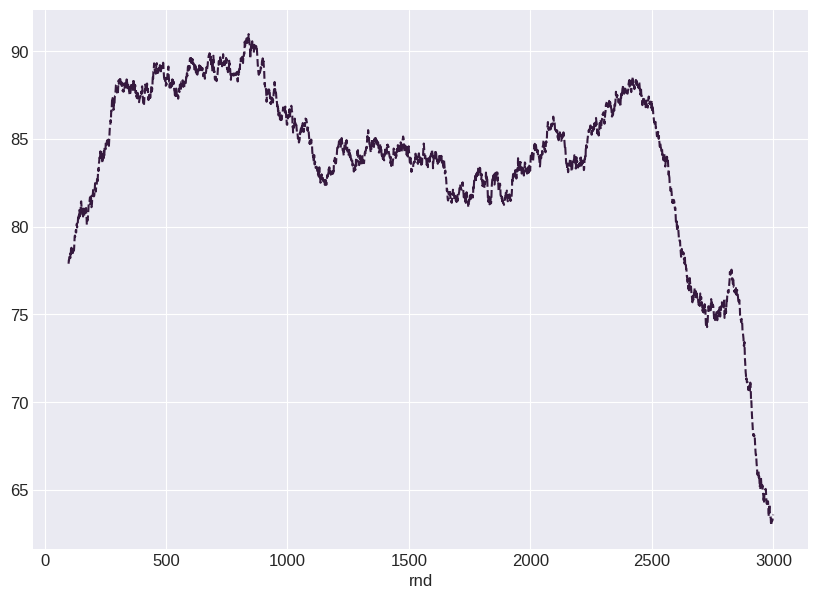

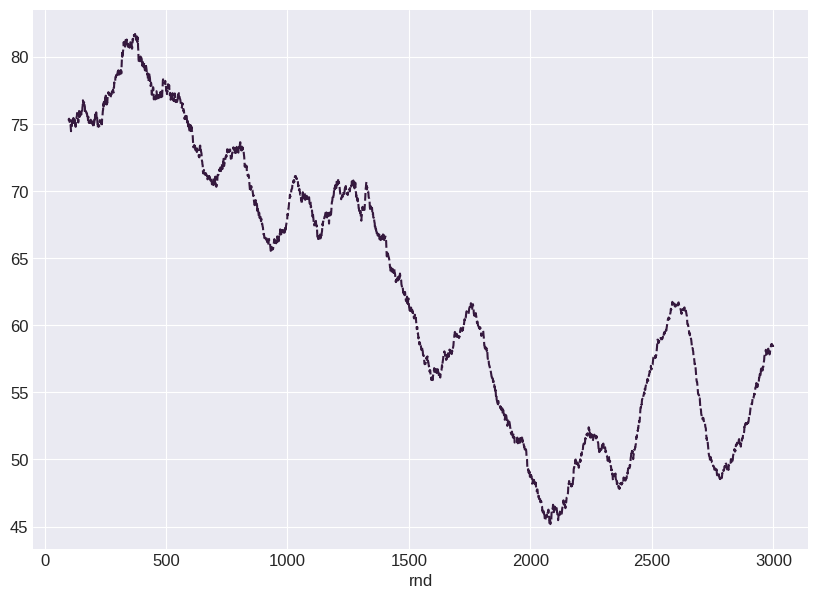

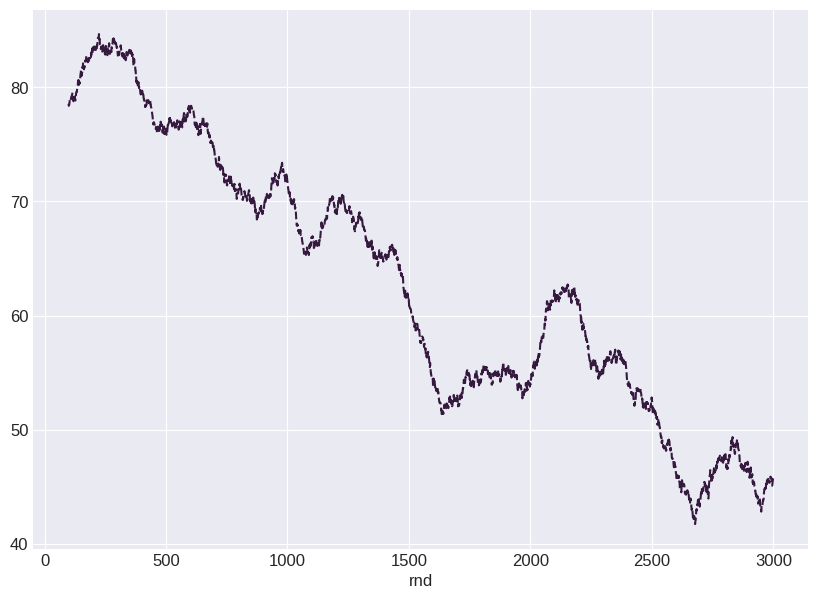

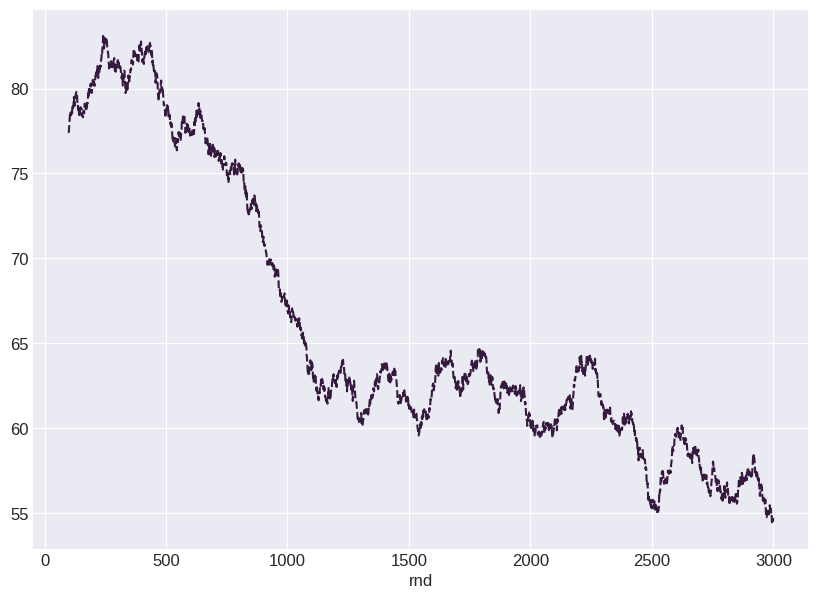

15


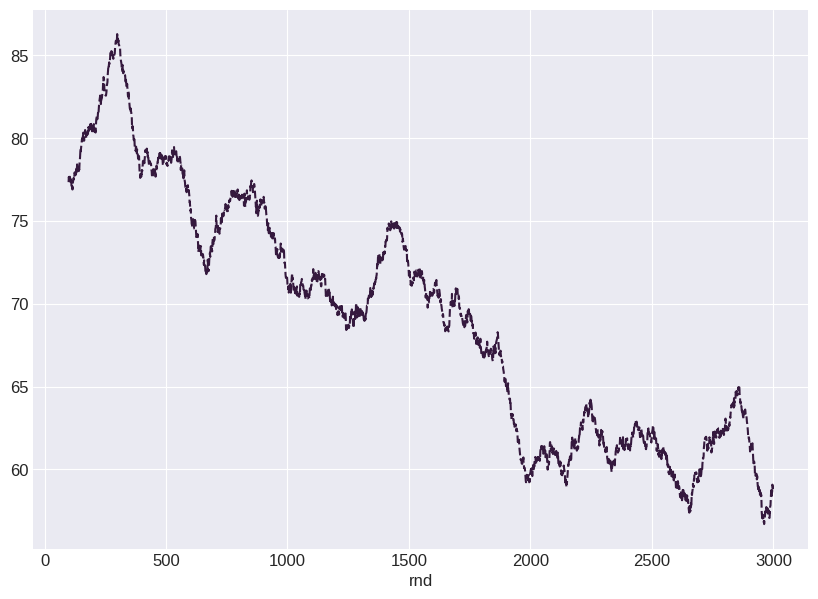

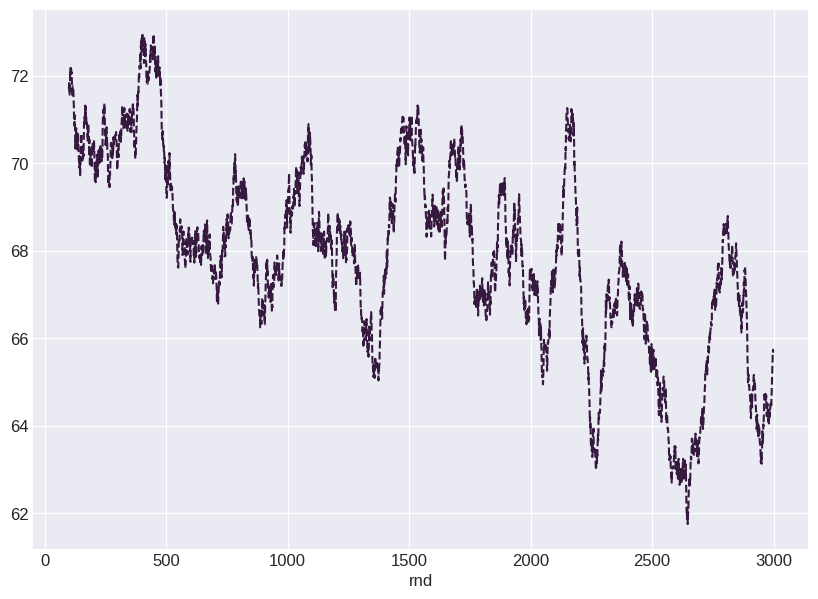

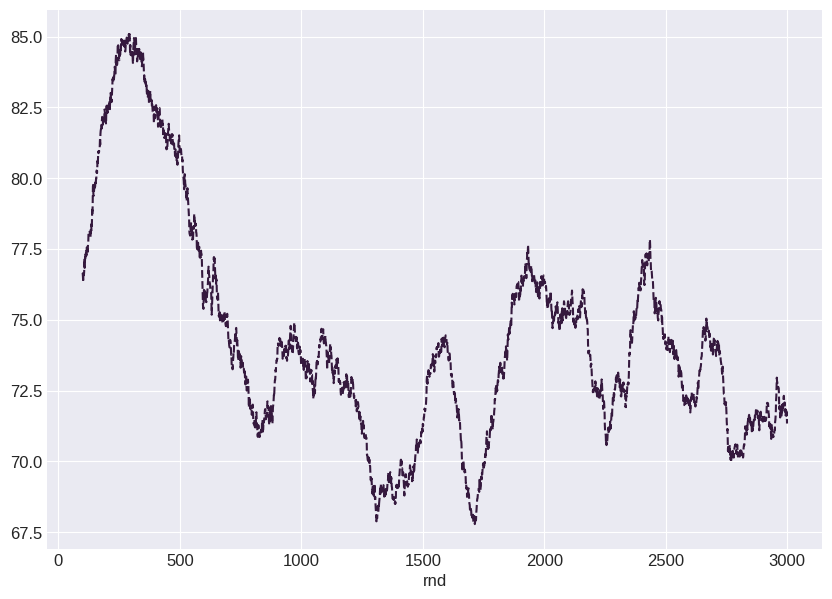

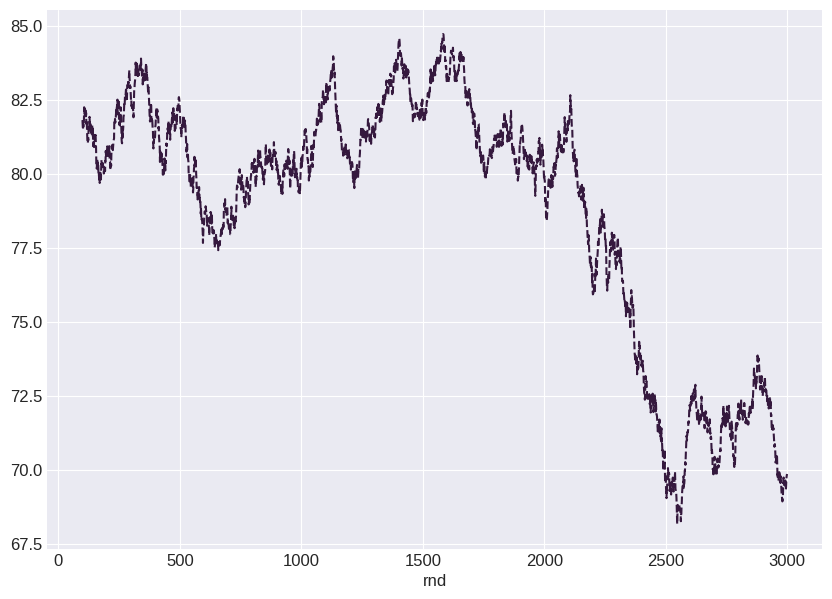

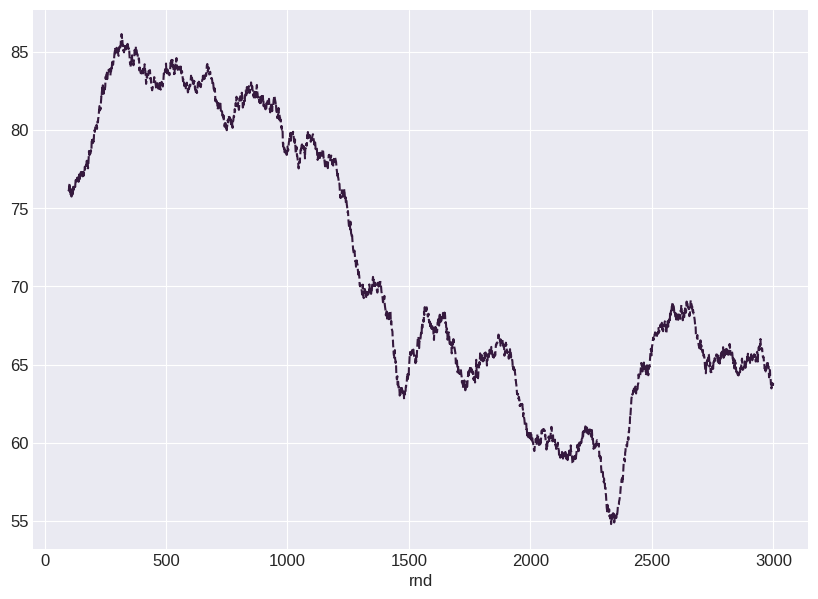

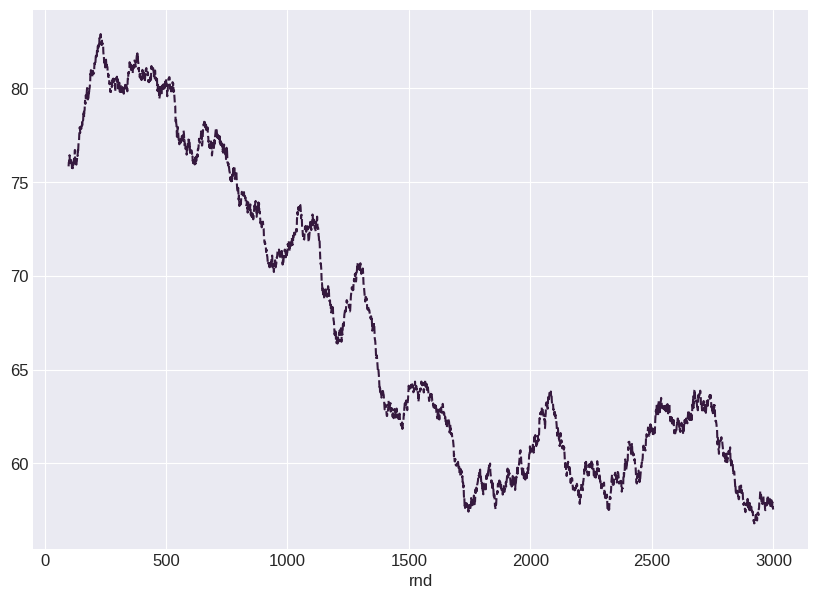

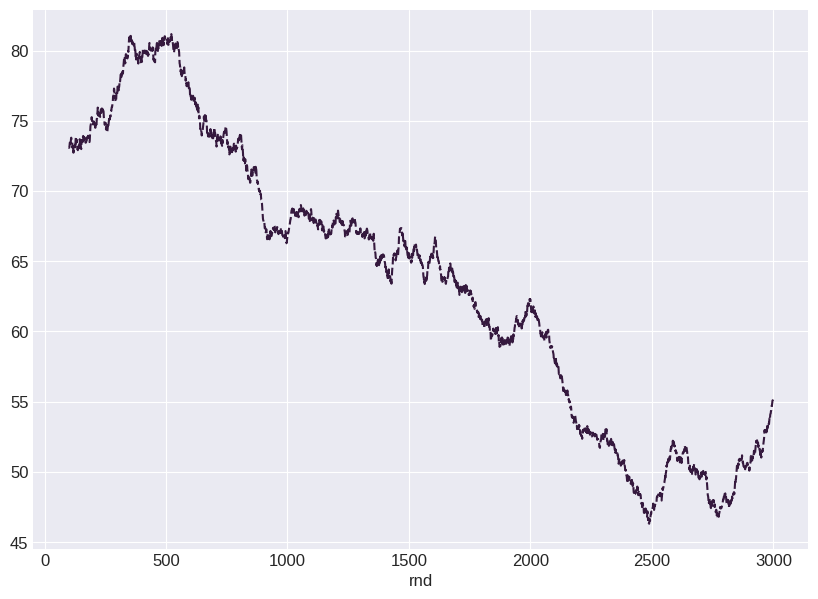

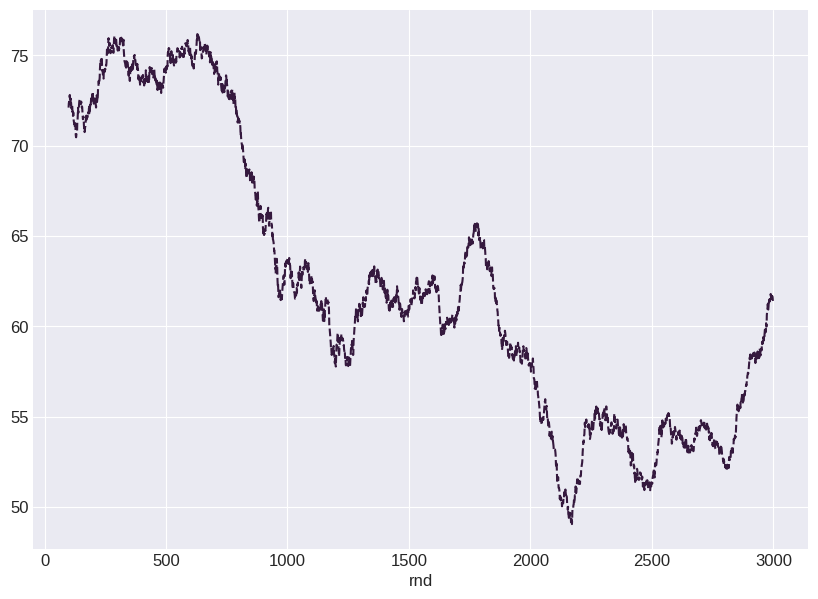

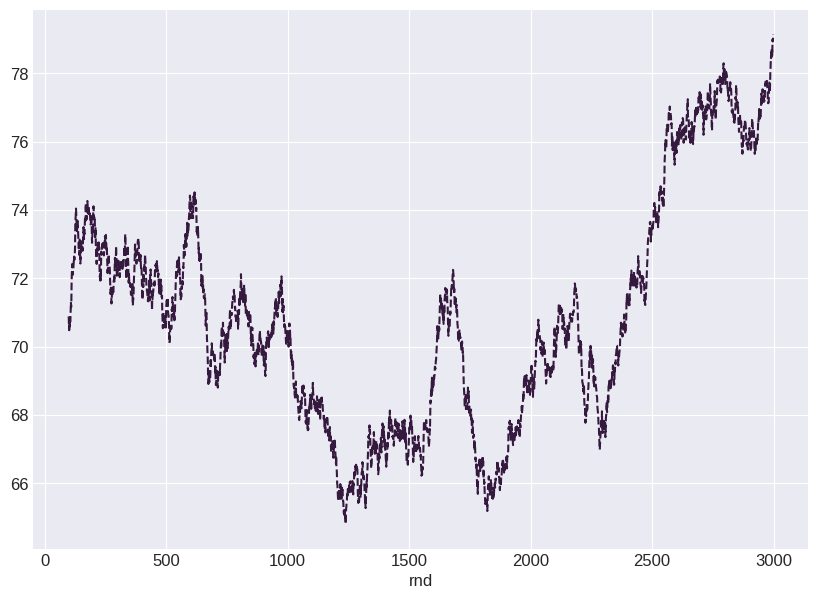

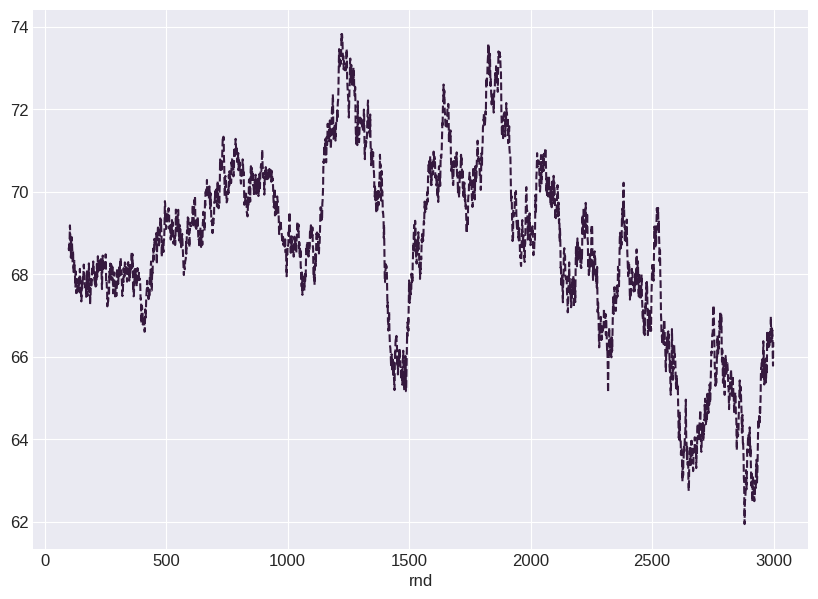

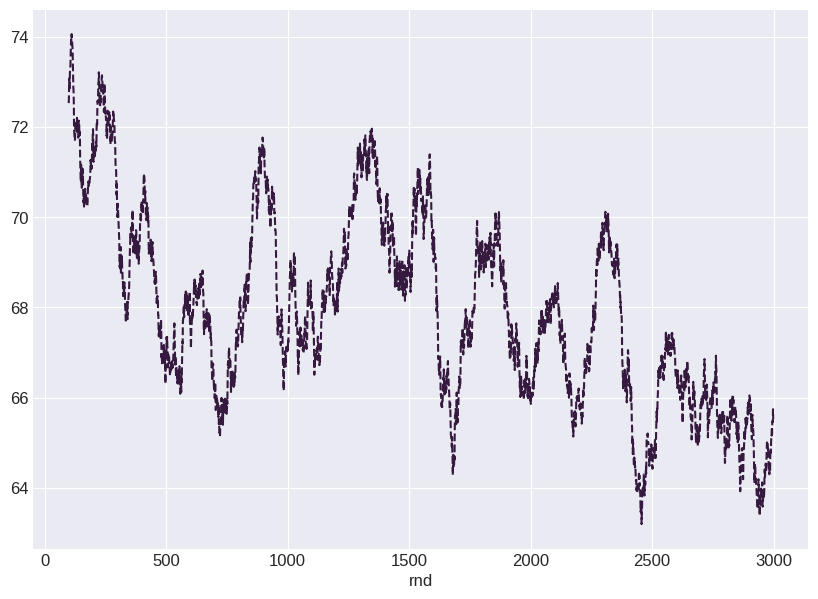

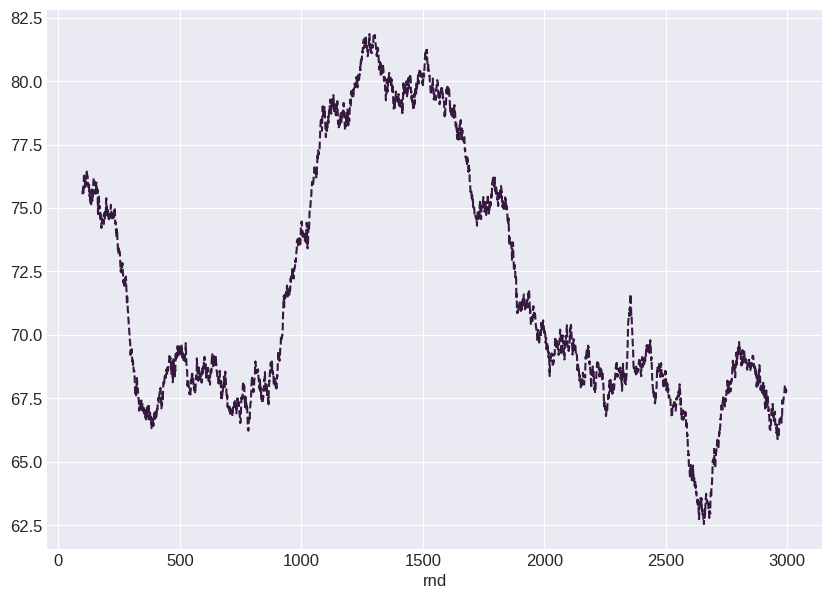

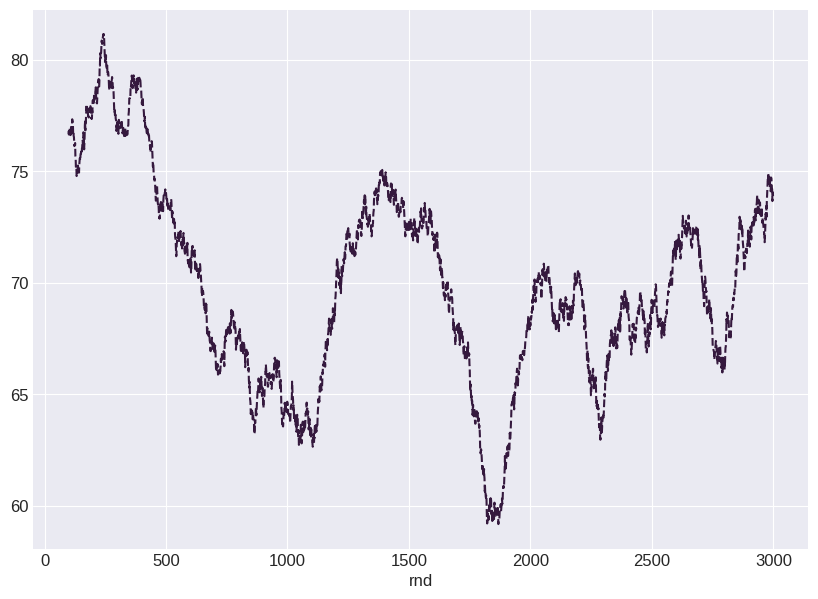

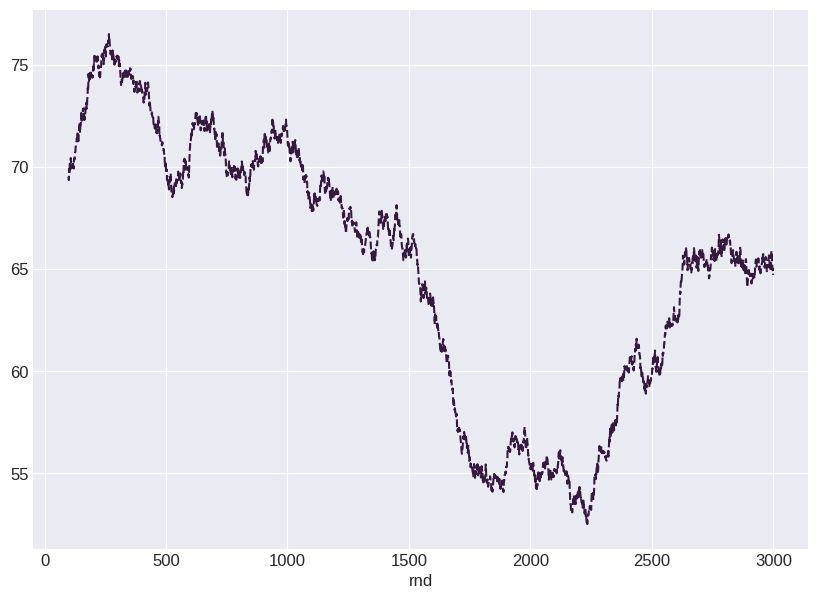

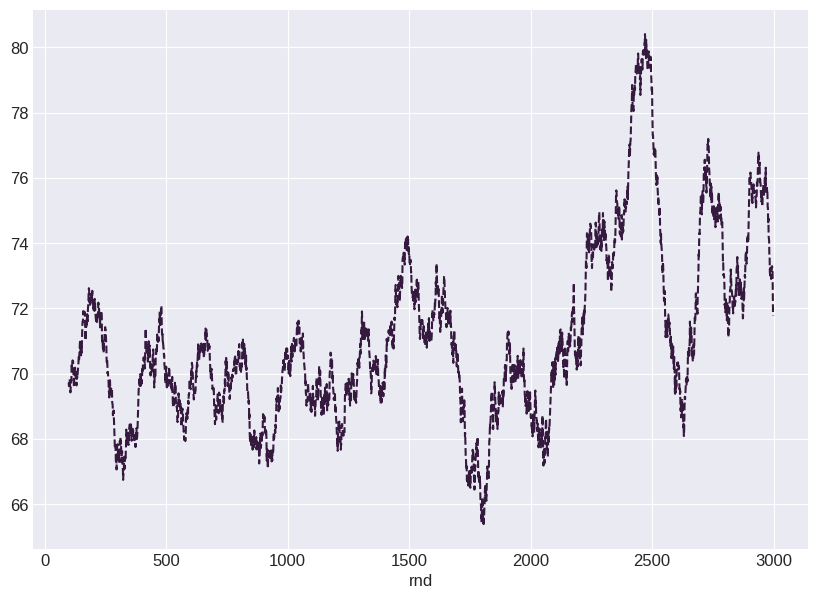

15


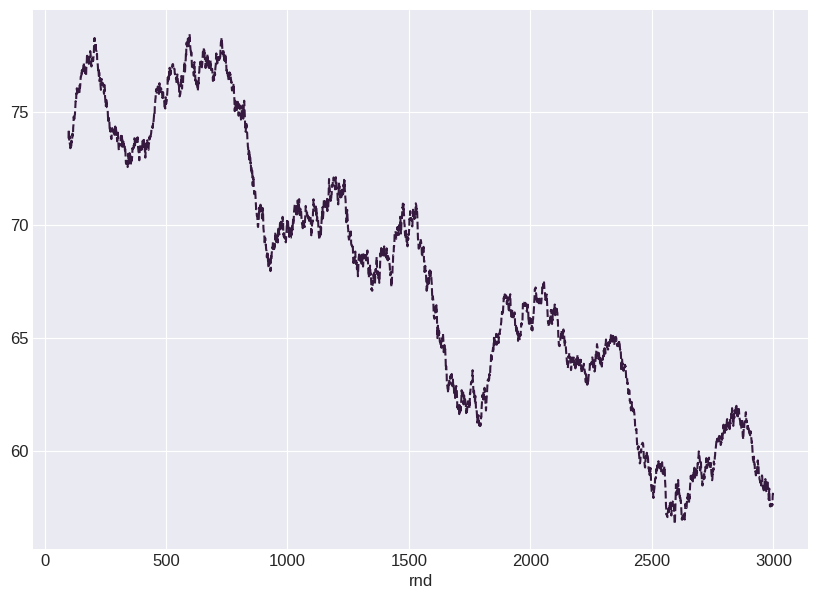

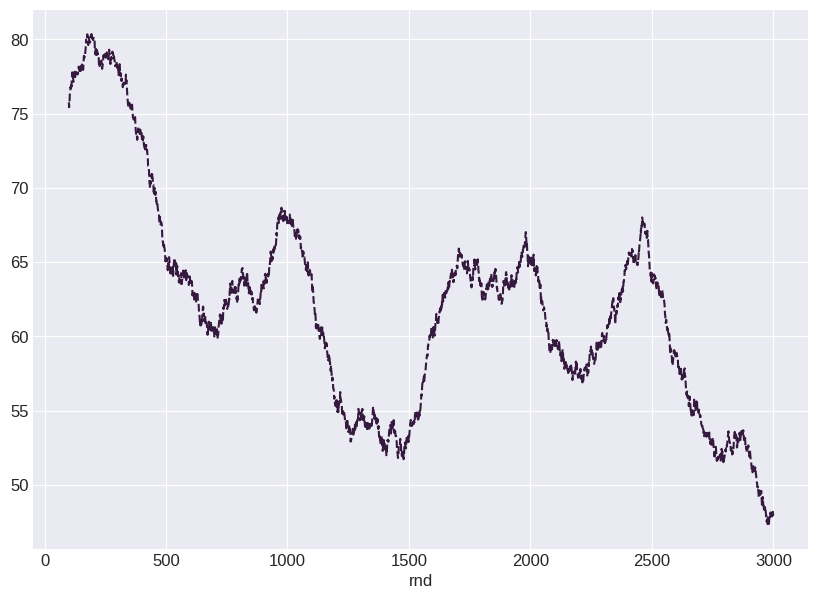

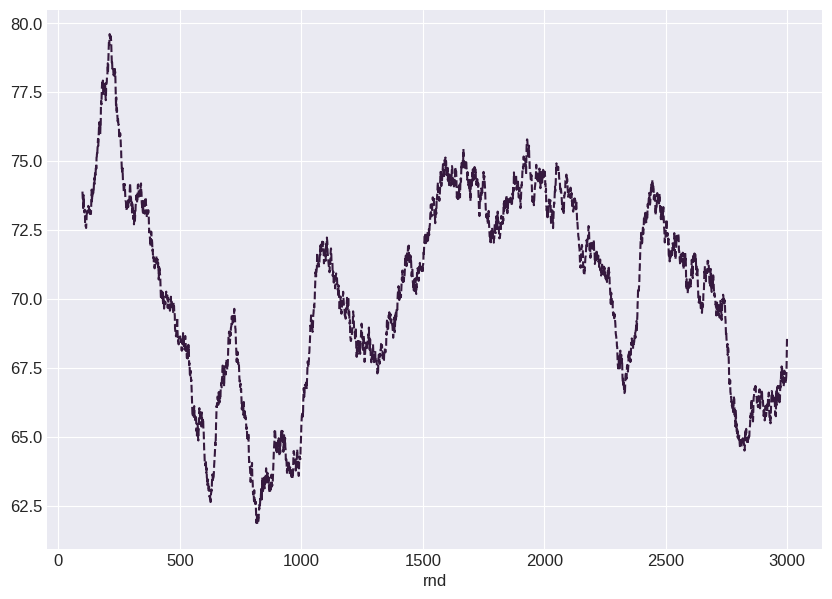

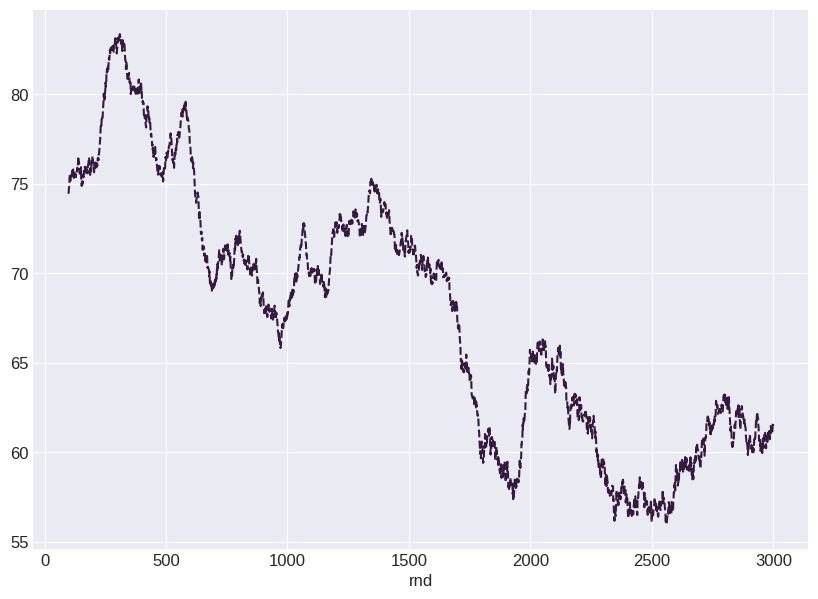

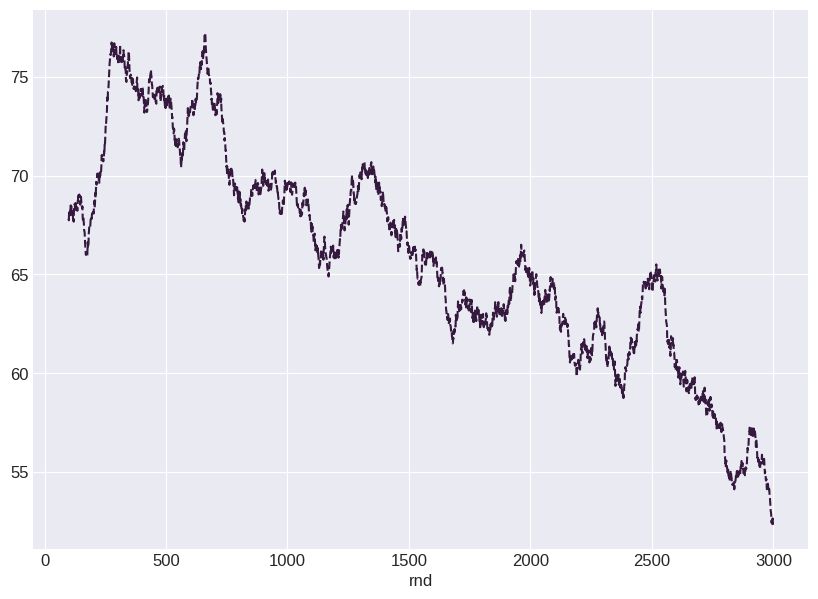

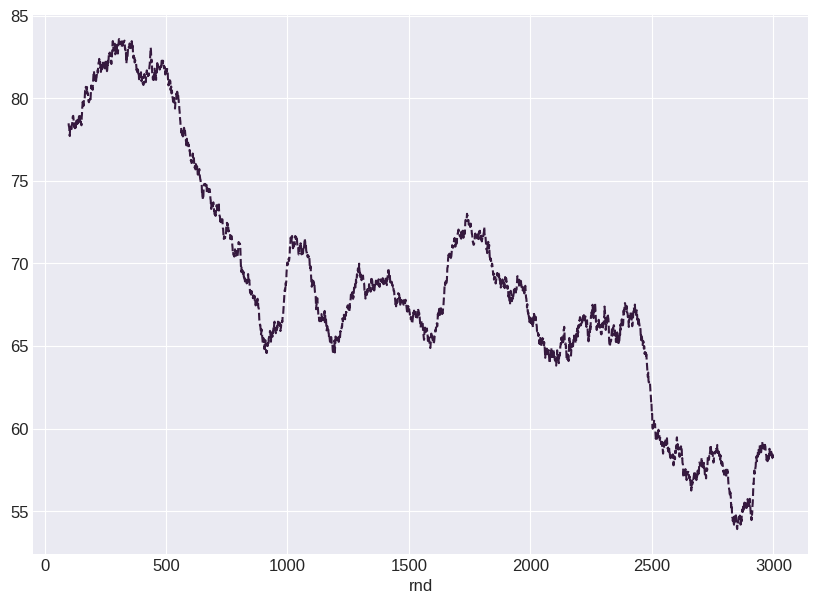

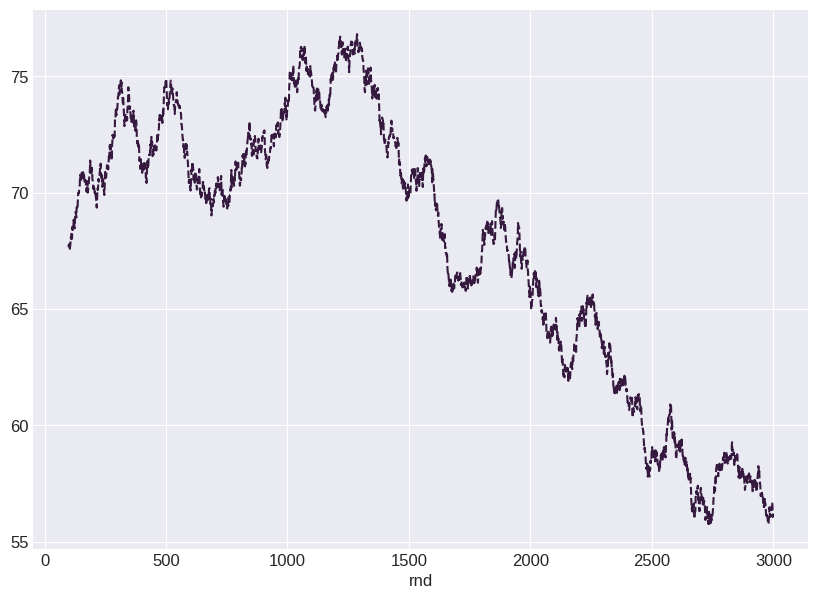

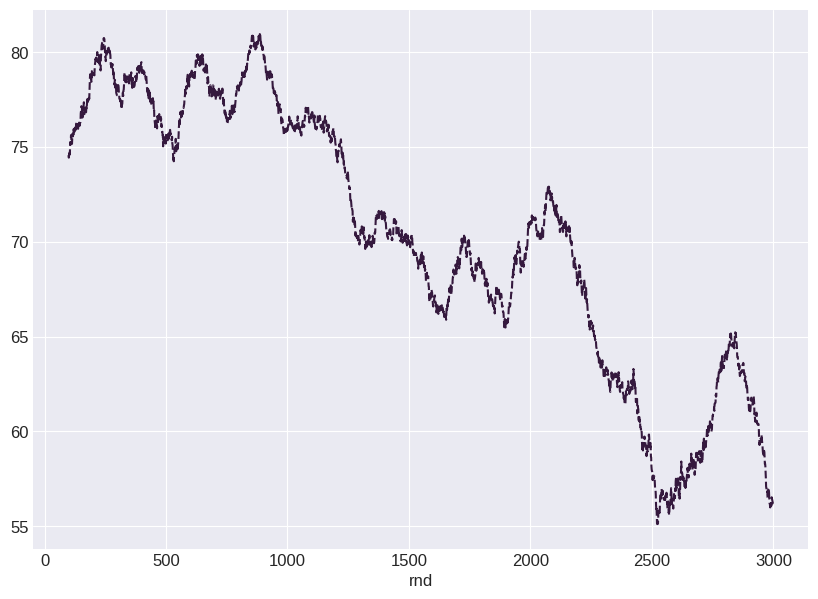

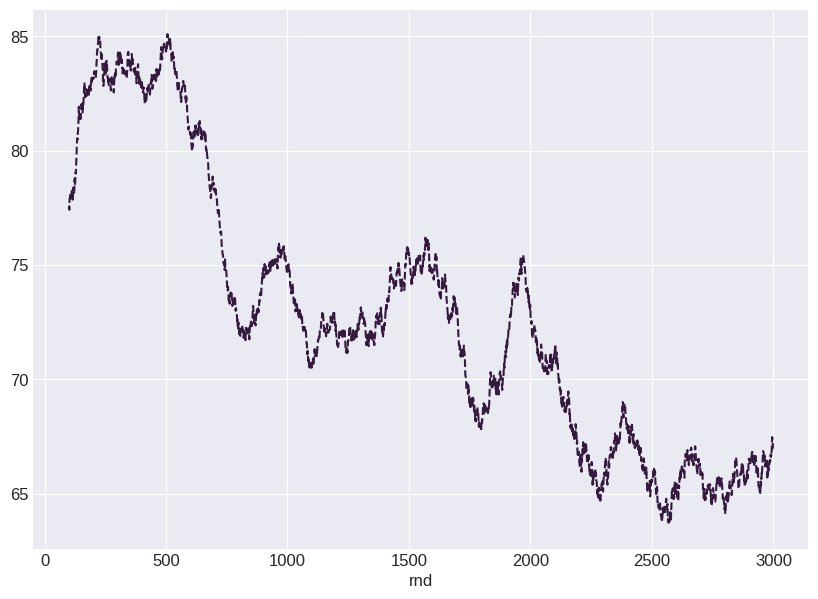

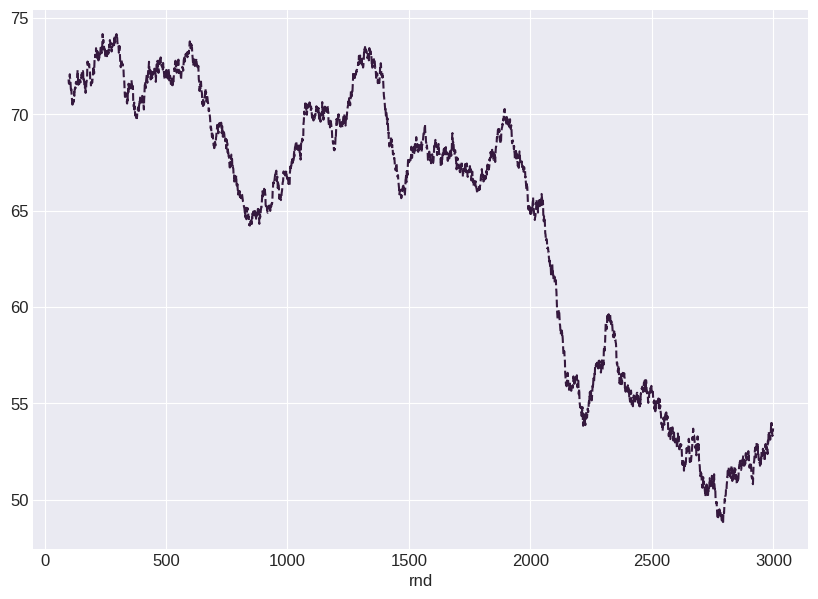

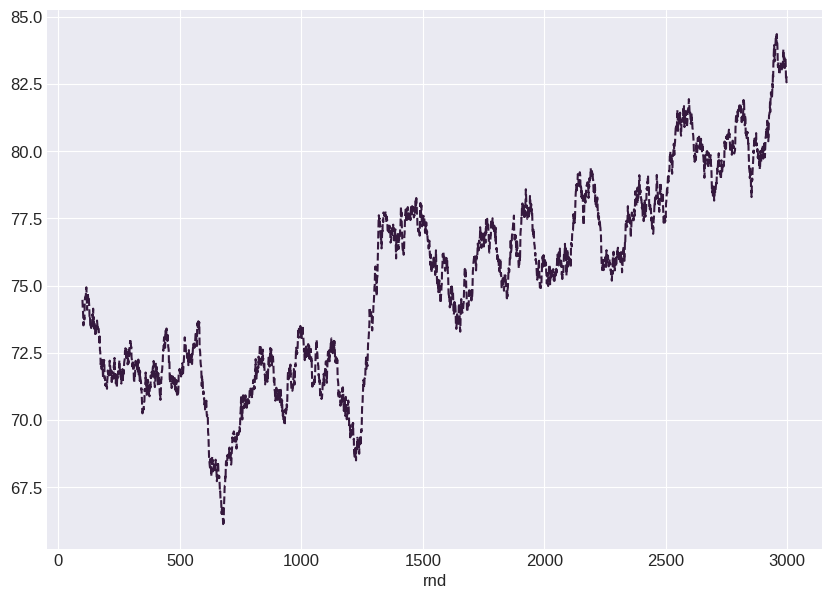

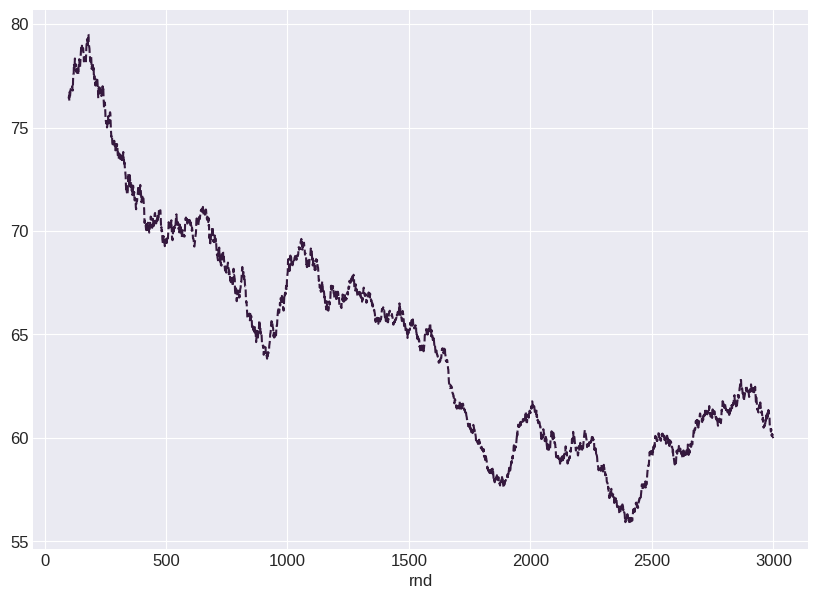

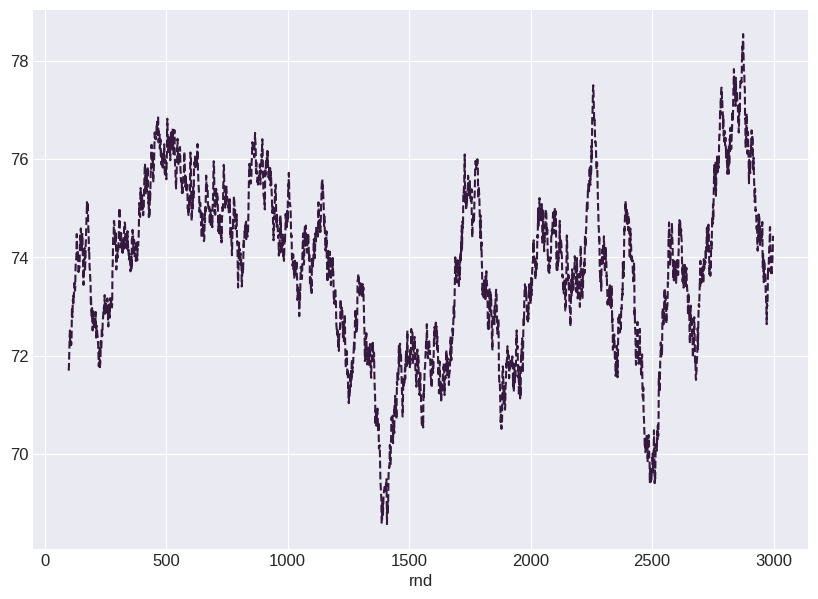

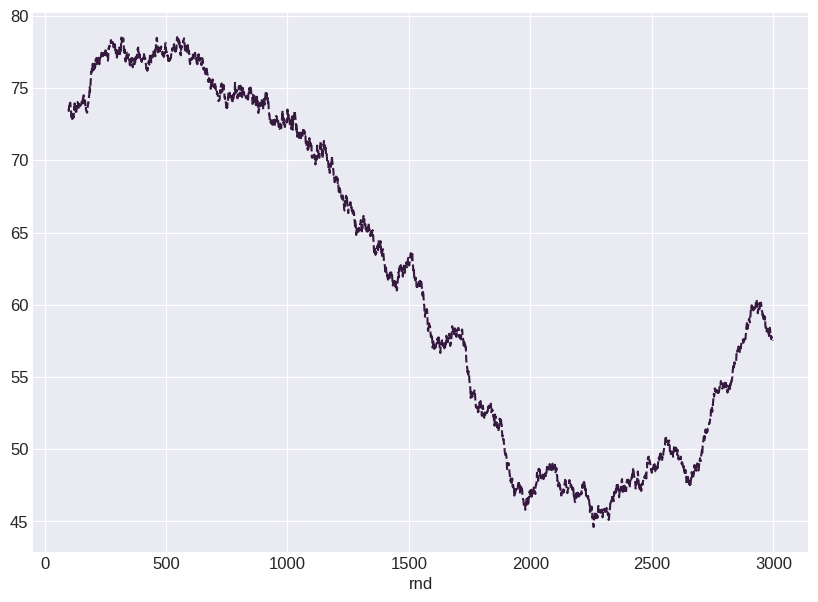

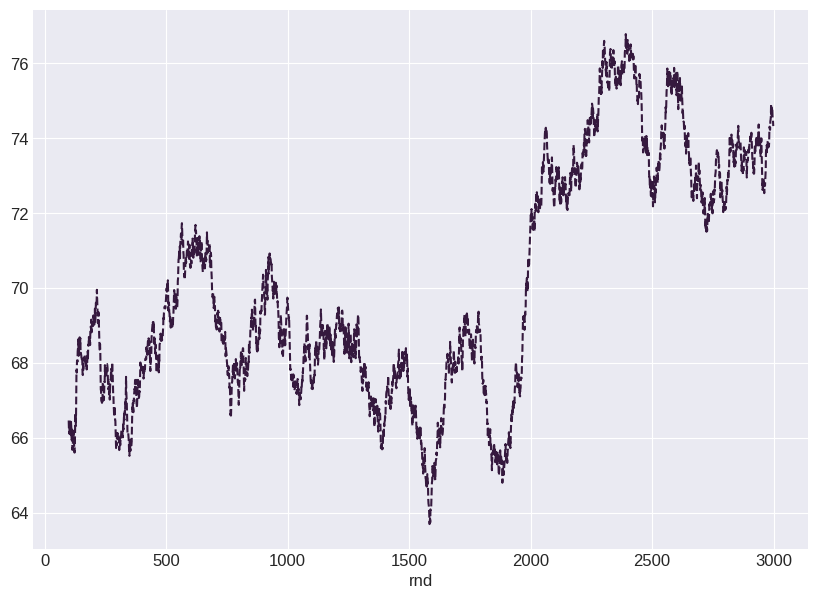

In [22]:
frac_profit = np.empty((3000, 15, 4))
frac_prices = np.empty((3000, 15, 4))
frac_sales = np.empty((3000, 15, 4))
std_profit = np.empty((3000, 15, 4))
std_price = np.empty((3000, 15, 4))
spread_profits = np.empty((3000, 15, 4))
spread_prices = np.empty((3000, 15, 4))

counts = []
for j, idx in enumerate([23, 15, 7, 1]):
    roundFiles = glob.glob(f'round_single_{idx}_*')
    logFiles = glob.glob(f'log_single_{idx}_*')
    print(len(roundFiles))
    counts.append(len(roundFiles))
    for i in range(len(roundFiles)):
        df = pd.read_csv(logFiles[i])
        df2 = pd.read_csv(roundFiles[i])

        buyerFrac = df[df.currentBidIdx_0==True].groupby('rnd').sum().bprofit #/ df2.buyerSurplus
        df[df.currentBidIdx_0==True].groupby('rnd').sum().bprofit.rolling(window=100).mean().plot()
        plt.show()
        priceFrac = df[df.currentBidIdx_0==True].groupby('rnd').mean().currentBid / df2.peq 
        saleFrac = df[df.currentBidIdx_0==True].groupby('rnd').sum().sale / df2.qeq 
        frac_profit[:, i, j] = buyerFrac.rolling(window=100).mean().values
        frac_prices[:, i, j] = priceFrac.rolling(window=100).mean().values
        frac_sales[:, i, j] = saleFrac.rolling(window=100).mean().values
        std_profit[:, i, j] = df[df.currentBidIdx_0==True].groupby('rnd').std().bprofit.rolling(window=100).mean().values
        std_price[:, i, j] = df[df.currentBidIdx_0==True].groupby('rnd').std().currentBid.rolling(window=100).mean().values

In [6]:
df.columns

Index(['Unnamed: 0', 'rnd', 'period', 'step', 'currentBid', 'currentAsk',
       'buy', 'sell', 'price', 'sale', 'currentBidIdx_0', 'currentBidIdx_1',
       'currentBidIdx_2', 'currentBidIdx_3', 'currentAskIdx_0',
       'currentAskIdx_1', 'currentAskIdx_2', 'currentAskIdx_3', 'bids_0',
       'bids_1', 'bids_2', 'bids_3', 'asks_0', 'asks_1', 'asks_2', 'asks_3',
       'bprofit', 'sprofit', 'currentBidIdx', 'currentAskIdx'],
      dtype='object')

/tmp/ipykernel_9597/4081635232.py:4: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_profit[:, :11, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_9597/4081635232.py:5: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_profit[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_9597/4081635232.py:6: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_profit[:, :, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_9597/4081635232.py:7: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_profit[:, :, 3], 1), label='A: No Disclosure')


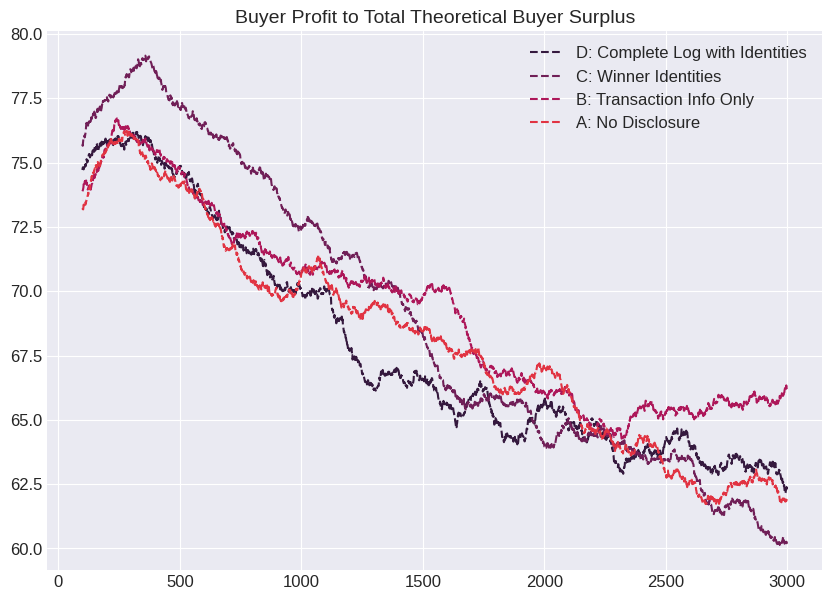

/tmp/ipykernel_9597/4081635232.py:13: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_prices[:, :11, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_9597/4081635232.py:14: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_prices[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_9597/4081635232.py:15: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_prices[:, :, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_9597/4081635232.py:16: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_prices[:, :, 3], 1), label='A: No Disclosure')


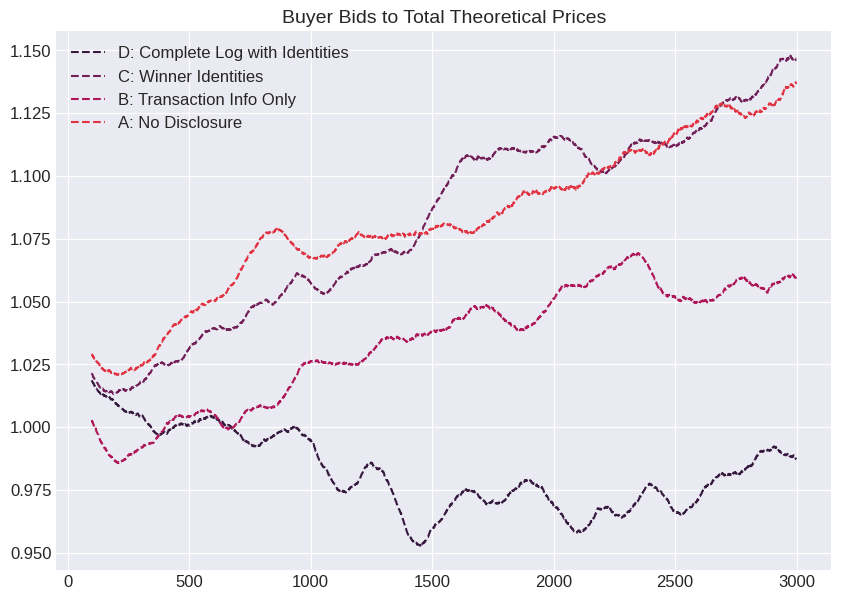

/tmp/ipykernel_9597/4081635232.py:22: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_sales[:, :11, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_9597/4081635232.py:23: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_sales[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_9597/4081635232.py:24: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_sales[:, :, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_9597/4081635232.py:25: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(frac_sales[:, :, 3], 1), label='A: No Disclosure')


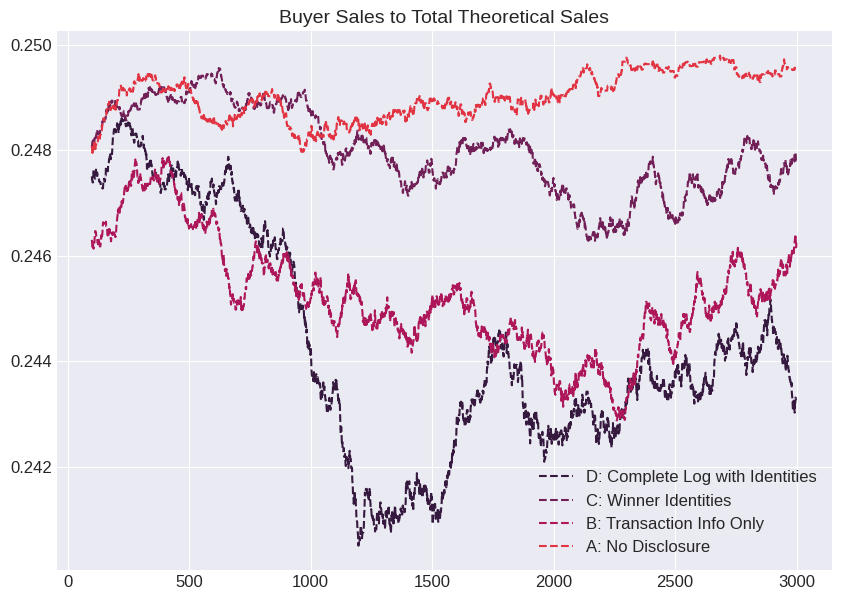

/tmp/ipykernel_9597/4081635232.py:31: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_profit[:, :11, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_9597/4081635232.py:32: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_profit[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_9597/4081635232.py:33: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_profit[:, :, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_9597/4081635232.py:34: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_profit[:, :, 3], 1), label='A: No Disclosure')


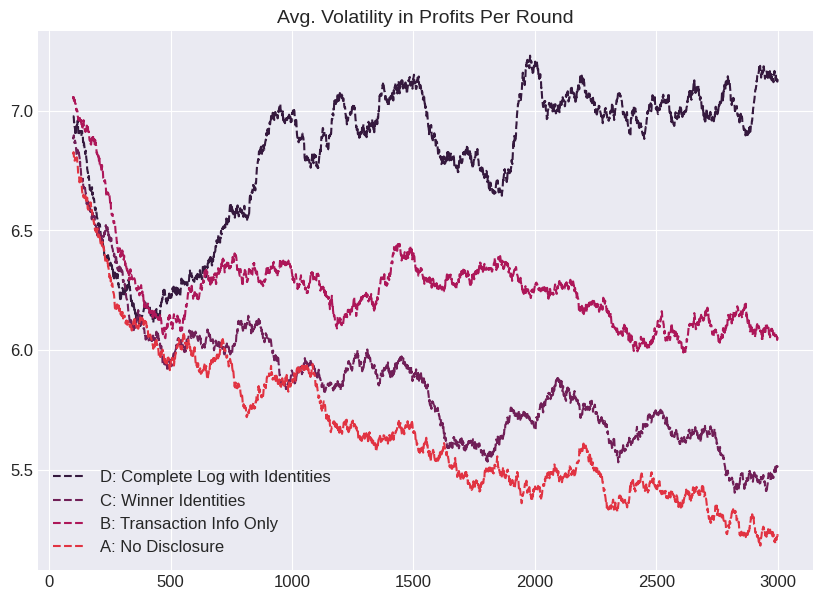

/tmp/ipykernel_9597/4081635232.py:40: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_price[:, :11, 0], 1), label='D: Complete Log with Identities')
/tmp/ipykernel_9597/4081635232.py:41: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_price[:, :, 1], 1), label='C: Winner Identities')
/tmp/ipykernel_9597/4081635232.py:42: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_price[:, :, 2], 1), label='B: Transaction Info Only')
/tmp/ipykernel_9597/4081635232.py:43: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(std_price[:, :, 3], 1), label='A: No Disclosure')


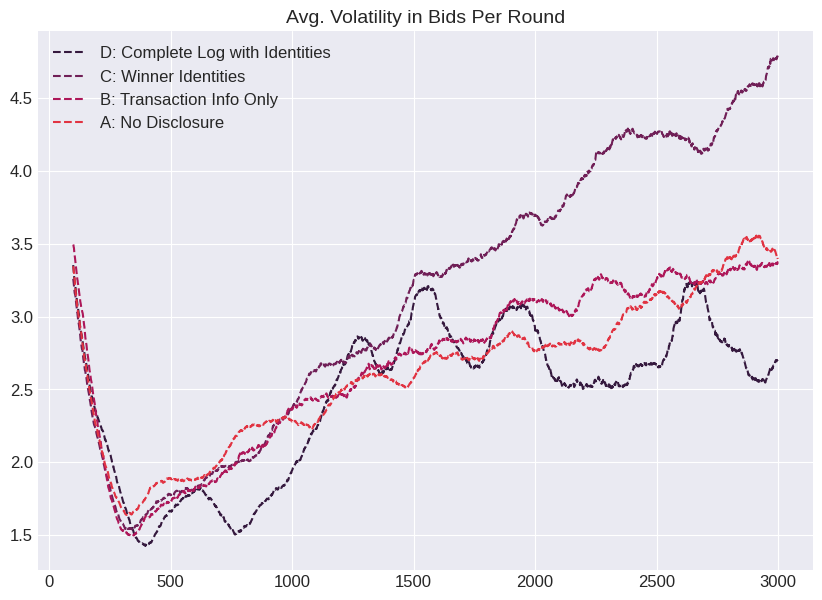

In [13]:
# Buyer Surplus: Actual vs Theoretical
sns.set_palette("rocket")

plt.plot(np.nanmean(frac_profit[:, :11, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(frac_profit[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(frac_profit[:, :, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(frac_profit[:, :, 3], 1), label='A: No Disclosure')
plt.title("Buyer Profit to Total Theoretical Buyer Surplus")
plt.legend()
plt.show()

# Mean Prices: Actual vs Theoretical
plt.plot(np.nanmean(frac_prices[:, :11, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(frac_prices[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(frac_prices[:, :, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(frac_prices[:, :, 3], 1), label='A: No Disclosure')
plt.title("Buyer Bids to Total Theoretical Prices")
plt.legend()
plt.show()

# Sales: Actual to Theoretical
plt.plot(np.nanmean(frac_sales[:, :11, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(frac_sales[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(frac_sales[:, :, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(frac_sales[:, :, 3], 1), label='A: No Disclosure')
plt.title("Buyer Sales to Total Theoretical Sales")
plt.legend()
plt.show()

# Avg. Volatility in Profits Per Round
plt.plot(np.nanmean(std_profit[:, :11, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(std_profit[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(std_profit[:, :, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(std_profit[:, :, 3], 1), label='A: No Disclosure')
plt.title("Avg. Volatility in Profits Per Round")
plt.legend()
plt.show()

# Avg. Volatility in Prices Per Round
plt.plot(np.nanmean(std_price[:, :11, 0], 1), label='D: Complete Log with Identities')
plt.plot(np.nanmean(std_price[:, :, 1], 1), label='C: Winner Identities')
plt.plot(np.nanmean(std_price[:, :, 2], 1), label='B: Transaction Info Only')
plt.plot(np.nanmean(std_price[:, :, 3], 1), label='A: No Disclosure')
plt.title("Avg. Volatility in Bids Per Round")
plt.legend()
plt.show()

<Axes: xlabel='rnd'>

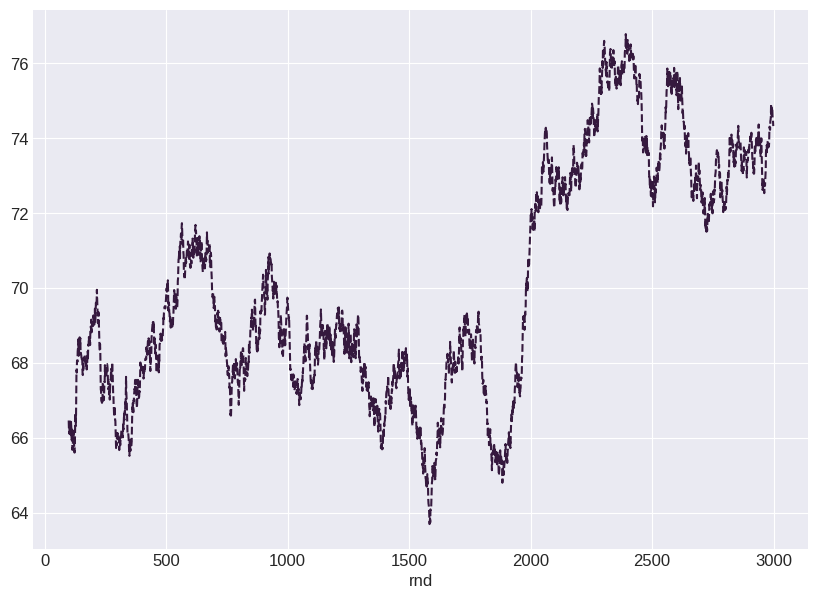

In [20]:
df[df.currentBidIdx_0==True].groupby('rnd').sum().bprofit.rolling(window=100).mean().plot()